<a href="https://colab.research.google.com/github/nischalp114/MSCS_634_ProjectDeliverable_3/blob/main/deliverable3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Decision Tree Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       960
           1       0.10      0.08      0.09        62

    accuracy                           0.90      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.89      0.90      0.89      1022

Confusion Matrix:
[[913  47]
 [ 57   5]]

k-NN Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.20      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

Confusion Matrix:
[[956   4]
 [ 61   1]]


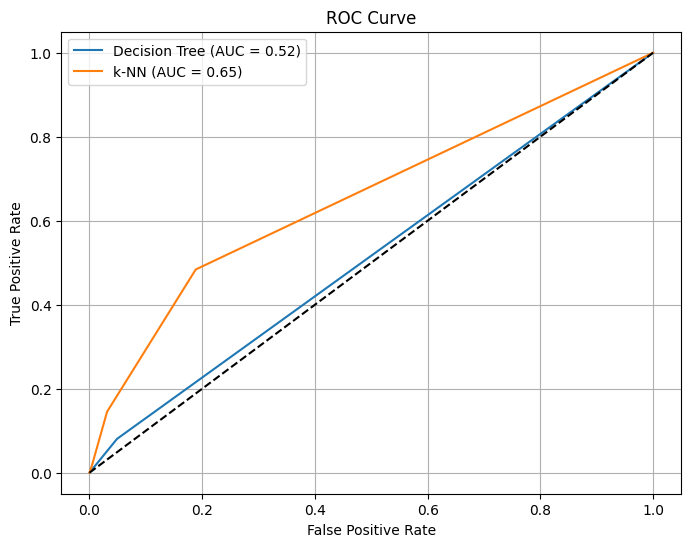

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Load the stroke prediction dataset
df = pd.read_csv("stroke_data.csv")

# Clean the data
df = df[df['gender'] != 'Other']  # Remove 'Other' from gender
df['bmi'] = df['bmi'].fillna(df['bmi'].median())  # Fill missing BMI with median
df.drop_duplicates(inplace=True)  # Remove duplicate rows

# Convert categorical columns to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Set up features and target
X = df_encoded.drop(columns=['stroke'])  # Features
y = df_encoded['stroke']                 # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Train a k-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Function to evaluate each model
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n{name} Results:")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    return auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt)
evaluate_model("k-NN", y_test, y_pred_knn, y_prob_knn)

# ROC plot setup
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning for Decision Tree ---
dt_params = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train_scaled, y_train)
best_dt = dt_grid.best_estimator_
print("Best Decision Tree Params:", dt_grid.best_params_)

# --- Evaluate Tuned Decision Tree ---
y_pred_best_dt = best_dt.predict(X_test_scaled)
print("\nTuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dt))


# --- Hyperparameter Tuning for k-NN ---
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_
print("Best k-NN Params:", knn_grid.best_params_)

# --- Evaluate Tuned k-NN ---
y_pred_best_knn = best_knn.predict(X_test_scaled)
print("\nTuned k-NN Classification Report:")
print(classification_report(y_test, y_pred_best_knn))


Best Decision Tree Params: {'max_depth': None, 'min_samples_split': 5}

Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.11      0.06      0.08        62

    accuracy                           0.91      1022
   macro avg       0.52      0.51      0.52      1022
weighted avg       0.89      0.91      0.90      1022

Best k-NN Params: {'n_neighbors': 3}

Tuned k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.17      0.03      0.05        62

    accuracy                           0.93      1022
   macro avg       0.55      0.51      0.51      1022
weighted avg       0.89      0.93      0.91      1022



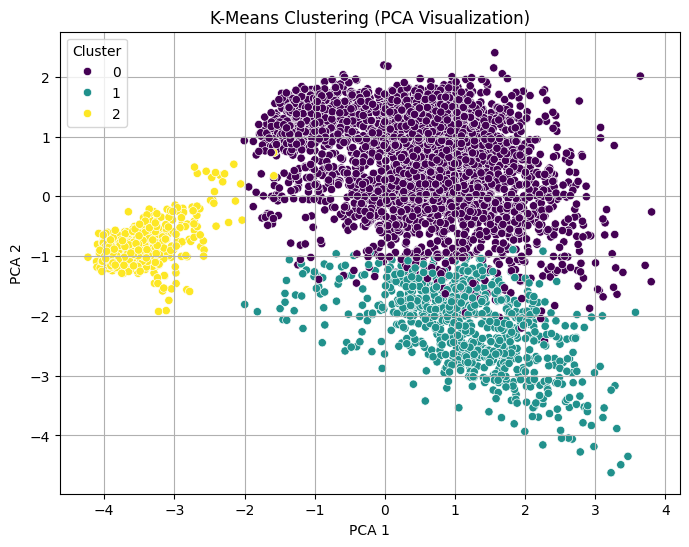

In [4]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv("stroke_data.csv")
df = df[df['gender'] != 'Other']
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.drop_duplicates(inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (we don't include the stroke label for clustering)
X = df_encoded.drop(columns=['stroke'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the original dataframe
df_encoded['cluster'] = clusters

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title("K-Means Clustering (PCA Visualization)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [5]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Copy dataset for rule mining
df_assoc = df.copy()

# Convert some numeric fields to categorical bins for pattern mining
df_assoc['age'] = pd.cut(df_assoc['age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'old'])
df_assoc['glucose'] = pd.cut(df_assoc['avg_glucose_level'], bins=3, labels=['low_glucose', 'medium_glucose', 'high_glucose'])
df_assoc['bmi'] = pd.cut(df_assoc['bmi'], bins=3, labels=['low_bmi', 'medium_bmi', 'high_bmi'])

# Replace binary values with labels
df_assoc['hypertension'] = df_assoc['hypertension'].replace({0: 'no_htn', 1: 'has_htn'})
df_assoc['heart_disease'] = df_assoc['heart_disease'].replace({0: 'no_hd', 1: 'has_hd'})
df_assoc['stroke'] = df_assoc['stroke'].replace({0: 'no_stroke', 1: 'had_stroke'})

# Select only categorical columns for association mining
columns_to_use = ['gender', 'ever_married', 'work_type', 'Residence_type',
                  'smoking_status', 'hypertension', 'heart_disease',
                  'age', 'glucose', 'bmi', 'stroke']

df_assoc = df_assoc[columns_to_use]

# Convert each row into a list of items
transactions = df_assoc.apply(lambda row: row.values.tolist(), axis=1).tolist()

# Encode the transaction data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_tf = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(df_tf, min_support=0.05, use_colnames=True)

# Generate rules with confidence and lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules_sorted = rules.sort_values(by='lift', ascending=False)

# Display top rules
pd.set_option('display.max_colwidth', None)
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


                                               antecedents  \
379959         (young, Unknown, no_htn, No, Male, low_bmi)   
380053                 (young, Unknown, No, Male, low_bmi)   
322111                 (young, Unknown, No, Male, low_bmi)   
380290                  (no_stroke, low_glucose, children)   
380196          (no_htn, no_stroke, low_glucose, children)   
322234                  (no_stroke, low_glucose, children)   
379434          (young, no_hd, Unknown, No, Male, low_bmi)   
396263          (young, no_hd, Unknown, No, Male, low_bmi)   
396133  (young, no_hd, Unknown, no_htn, No, Male, low_bmi)   
396826          (no_htn, no_stroke, low_glucose, children)   

                                        consequents   support  confidence  \
379959           (no_stroke, low_glucose, children)  0.058328    0.732187   
380053   (no_htn, no_stroke, low_glucose, children)  0.058328    0.732187   
322111           (no_stroke, low_glucose, children)  0.058328    0.732187   
380290  (